In [6]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython import display
import plotly as plotly
%matplotlib inline
import seaborn as sns

import calendar
import datetime as dt
from datetime import timedelta, date
from pprint import pprint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from scipy.stats import randint as sp_randint
from time import time
import pickle

import warnings
warnings.filterwarnings('ignore')

random_state = 123

In [8]:

legend_elements = [Patch(facecolor='#5D666D', label='Training weeks'),
                   Patch(facecolor='#BFD630', label='Testing weeks')]
fig, ax = plt.subplots(figsize=(20,1))
ax.legend(handles=legend_elements, loc='center')
plt.axis('off')
plt.show()
# Display gif
display.Image('/content/LF/Animated_3D_plot.gif')

Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'Load (MWh)')

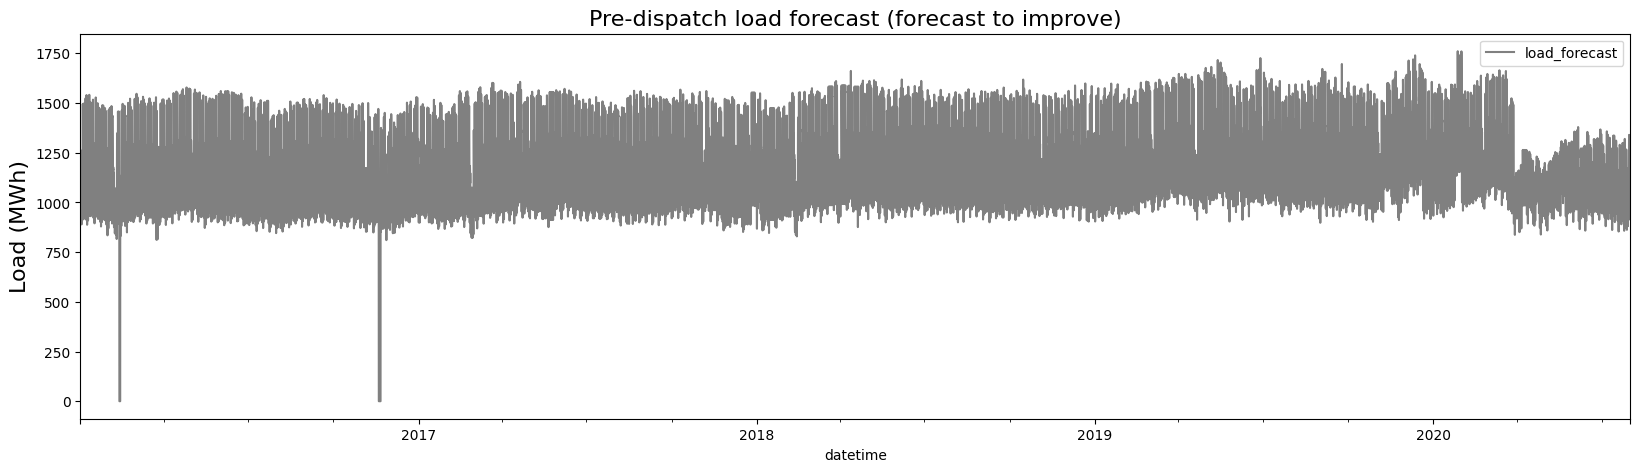

In [10]:
pre_disp_df = pd.read_csv('/content/LF/weekly pre-dispatch forecast.csv')
pre_disp_df.set_index('datetime', inplace=True)

pre_disp_df.index = pd.to_datetime(pre_disp_df.index)

# plot weekly pre-dispatch forecast (forecast to improve)
pre_disp_df.plot(figsize=(20,5), color='grey')
plt.title('Pre-dispatch load forecast (forecast to improve)', fontsize=16)
plt.ylabel('Load (MWh)', fontsize=16)

In [16]:

train_dict = pd.read_excel(open('/content/LF/train_dataframes.xlsx','rb'), sheet_name = None, index_col=0)
test_dict = pd.read_excel(open('/content/LF/test_dataframes.xlsx','rb'), sheet_name = None, index_col=0)

In [17]:
df = pd.read_csv('/content/train_dataframes.csv')
df
df = df[["hourOfDay","DEMAND"]].head(2400)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hourOfDay  2400 non-null   int64  
 1   DEMAND     2400 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 37.6 KB


<Axes: >

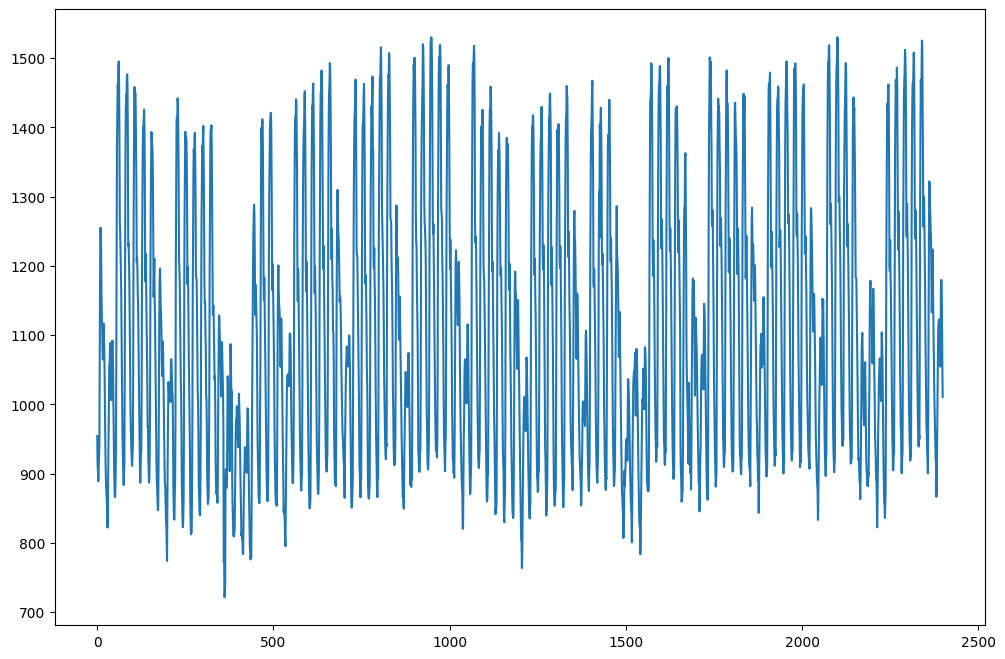

In [18]:
df["DEMAND"].head(24000).plot(figsize=(12,8))

In [19]:
df['Demand_1dayback_thishour']=df['DEMAND'].shift(+24)
df['Demand_2dayback_thishour']=df['DEMAND'].shift(+48)
df['Demand_3dayback_thishour']=df['DEMAND'].shift(+72)
df.head(48)

,hourOfDay,DEMAND,Demand_1dayback_thishour,Demand_2dayback_thishour,Demand_3dayback_thishour
0,1,954.2018,NaN,NaN,NaN
1,2,913.8660,NaN,NaN,NaN
2,3,903.3637,NaN,NaN,NaN
3,4,889.0806,NaN,NaN,NaN
4,5,910.1472,NaN,NaN,NaN
5,6,922.1737,NaN,NaN,NaN
6,7,939.9442,NaN,NaN,NaN
7,8,1077.8575,NaN,NaN,NaN
8,9,1179.6601,NaN,NaN,NaN
9,10,1255.1569,NaN,NaN,NaN


In [20]:

from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [22]:
import numpy as np
df = df[72:]
x1,x2,x3,y=df["Demand_1dayback_thishour"],df["Demand_2dayback_thishour"],df["Demand_3dayback_thishour"],df['DEMAND']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 905.0674  904.3712  954.2018]
 [ 879.561   883.9448  913.866 ]
 [ 866.0936  871.9966  903.3637]
 ...
 [1099.8114 1169.453  1156.3924]
 [1063.4133 1097.3848 1106.8532]
 [1020.8216 1051.1565 1046.9602]]


In [23]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [24]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

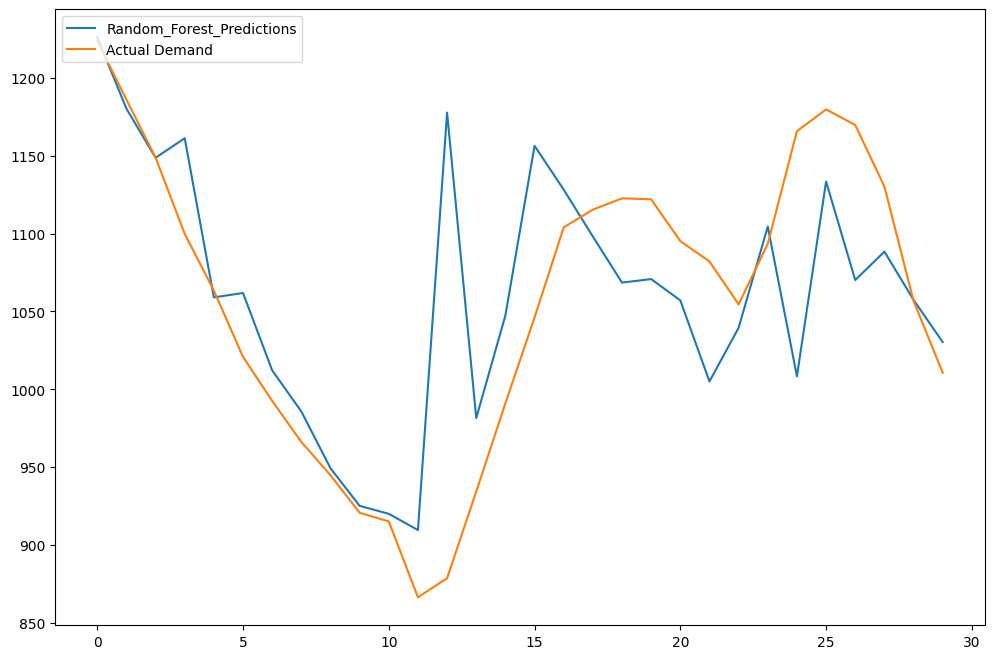

In [25]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Demand')
plt.legend(loc="upper left")
plt.show()

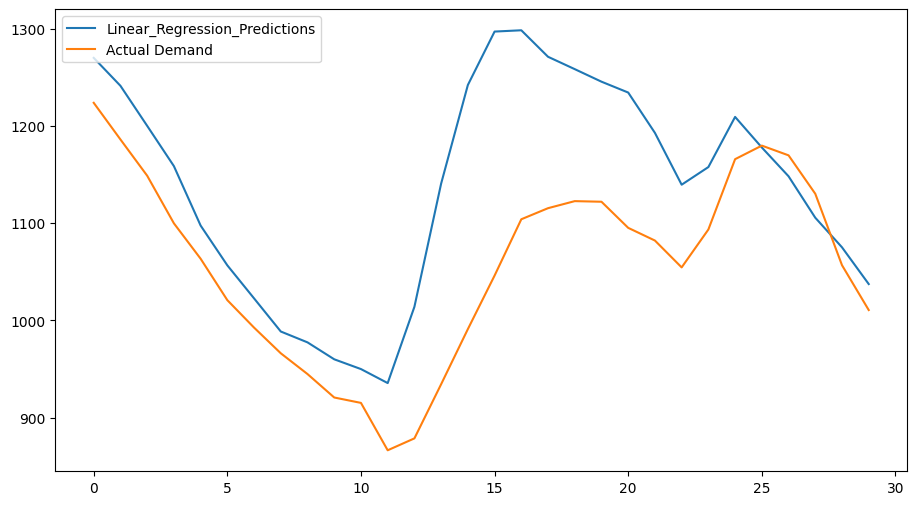

In [26]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Demand')
plt.legend(loc="upper left")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [28]:

print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 74.8641165772474
Mean Squared Error for Linear Regression Model is: 108.44044850860035


In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [30]:
mean_absolute_percentage_error(y_test,pred)

9.77

In [31]:
100-9.77

90.23

In [32]:
mean_absolute_percentage_error(y_test,lin_pred)

8.01

In [33]:
100-8.01

91.99